# Introduction Forecasting with State Space Models (Unobserved Components)

In this notebook we will provide a very short introduction into a family of state space models for time series forecasting: [*Univariate unobserved components time series model*](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.structural.UnobservedComponents.html). We will use the implementation available in [statsmodels](https://www.statsmodels.org/stable/index.html). Please refer do the (great!) documentation to get more details on the model structure and assumptions. 

---

# Part I: Introduction + Model Structure

Let us take some main aspects from the [Time Series Analysis by State Space Methods `statespace` User Guide](https://www.statsmodels.org/stable/statespace.html):

## State Space Model Structure

Let us consider the general form of state space models:

<center>
  <figure>
    <img src="images/statsmodels_docs_images/ssm_structure.png" style="width: 800px;"/>
    <figcaption> Taken https://www.statsmodels.org/stable/statespace.html </figcaption>
  </figure>
</center>

## Example: AR(2) Model

Auto-regressive model can be written as space state models. For example for an $AR(2)$ process we have:

<center>
  <figure>
    <img src="images/statsmodels_docs_images/ssm_ar.png" style="width: 800px;"/>
    <figcaption> Taken https://www.statsmodels.org/stable/statespace.html </figcaption>
  </figure>
</center>

## Example: Exponential Smoothing

Exponential smoothing models can also be written as state space models, see [Forecasting Principles: Principles and Practice, Innovations state space models for exponential smoothing](https://otexts.com/fpp3/ets.html).

<center>
  <figure>
    <img src="images/statsmodels_docs_images/ssm_es.png" style="width: 800px;"/>
    <figcaption> Taken from https://otexts.com/fpp3/ets.html </figcaption>
  </figure>
</center>

## Unobserved Components Model

Next we deep-dive into the unobserved components state space model. 

<center>
  <figure>
    <img src="images/statsmodels_docs_images/uc_intro.png" style="width: 800px;"/>
    <figcaption> Taken from https://www.statsmodels.org/devel/examples/notebooks/generated/statespace_structural_harvey_jaeger.html </figcaption>
  </figure>
</center>

The most general structure has the form:

<center>
  <figure>
    <img src="images/statsmodels_docs_images/uc_structure.png" alt="glue" style="width: 500px;"/>
    <figcaption> Taken from https://www.statsmodels.org/devel/examples/notebooks/generated/statespace_structural_harvey_jaeger.html </figcaption>
  </figure>
</center>

Now let us explore each of the components:

### Trend:

Here is the model for the trend component:

$$
\begin{align*}
y_t &= \mu_t + \varepsilon_t \quad \text{(observed time series)}\\
\mu_t &= \mu_{t-1} + \beta_{t-1} + \eta_{t-1} \quad \text{(level component)}\\
\beta_t &= \beta_{t-1} + \zeta_{t-1} \quad \text{(trend component)}
\end{align*}
$$

There are many model flavours, e.g.

<center>
  <figure>
    <img src="images/statsmodels_docs_images/uc_types.png" style="width: 500px;"/>
    <figcaption> Taken from https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.structural.UnobservedComponents.html </figcaption>
  </figure>
</center>

### Seasonality

<center>
  <figure>
    <img src="images/statsmodels_docs_images/uc_seasonal.png" style="width: 800px;"/>
    <figcaption> Taken from https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.structural.UnobservedComponents.html </figcaption>
  </figure>
</center>

### Cycle

The cyclical component is intended to capture cyclical effects at time frames much longer than captured by the seasonal component.

### Other Components

<center>
  <figure>
    <img src="images/statsmodels_docs_images/uc_other.png" alt="glue" style="width: 800px;"/>
    <figcaption> Taken from https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.structural.UnobservedComponents.html </figcaption>
  </figure>
</center>


## Parameter Estimation

For a comprehensive introduction into the model parameter estimation please see [Time Series Analysis and Its Applications - Chapter 6: Space Space Models](https://www.stat.pitt.edu/stoffer/tsa4/Chapter6.pdf). Still, 

> *The estimation of the parameters that specify the state space model is quite involved.*

Overall there are two ingredients: (1) The [Kalman filter](https://en.wikipedia.org/wiki/Kalman_filter) and a (2) [Expectation–maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) step. In a nutshell: 

> *The overall procedure can be regarded as simply alternating between the Kalman filtering and smoothing recursions and the multivariate normal maximum likelihood estimators.*

### Kalman Filter

> [**Wiki**]((https://en.wikipedia.org/wiki/Kalman_filter)): *The algorithm works by a two-phase process. For the prediction phase, the Kalman filter produces estimates of the current state variables, along with their uncertainties. Once the outcome of the next measurement (necessarily corrupted with some error, including random noise) is observed, these estimates are updated using a weighted average, with more weight being given to estimates with greater certainty. The algorithm is recursive. It can operate in real time, using only the present input measurements and the state calculated previously and its uncertainty matrix; no additional past information is required.*

Mathematically:
> Let $x^{s}_{t} \coloneqq E(x_{t} | y_{1:s})$. The Kalman filter gives the filtering ($s=t$) and forecasting ($s < t$) equations. The name *filter* comes from the fact that $x_{t}^{t} = \sum_{s=1}^{t} B_{s} y_{s}$ for suitably chosen $p \times q$ matrices $B_s$. The advantage of the Kalman filter is that it specifies how to update the filter from $x_{t - 1}^{t - 1}$ to $x_{t}^{t}$ once a new observation $y_t$ is obtained, without having to reprocess the entire data set $y_{1:t}$.

### Expectation–Maximization

> Wiki: *In statistics, an expectation–maximization (EM) algorithm is an iterative method to find (local) maximum likelihood or maximum a posteriori (MAP) estimates of parameters in statistical models, where the model depends on unobserved latent variables. The EM iteration alternates between performing an expectation (E) step, which creates a function for the expectation of the log-likelihood evaluated using the current estimate for the parameters, and a maximization (M) step, which computes parameters maximizing the expected log-likelihood found on the E step. These parameter-estimates are then used to determine the distribution of the latent variables in the next E step.*

## References:

- [Statsmodels documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.structural.UnobservedComponents.html)
- [Lecture Videos: Understanding Kalman Filters (YouTube)](https://www.youtube.com/watch?v=mwn8xhgNpFY&list=PLn8PRpmsu08pzi6EMiYnR-076Mh-q3tWr)
- [Time Series Analysis by State Space Methods](https://oxford.universitypressscholarship.com/view/10.1093/acprof:oso/9780199641178.001.0001/acprof-9780199641178), Durbin, James, and Siem Jan Koopman
- [Time Series Analysis and Its Applications - Chapter 6: Space Space Models](https://www.stat.pitt.edu/stoffer/tsa4/Chapter6.pdf)
- [Forecasting with the Kalman Filter (PyData Chicago 2016)](https://www.youtube.com/watch?v=GmSXhmbv5Zg), by Mike Mull
- [Modern Time Series Analysis (SciPy 2019 Tutorial)](https://www.youtube.com/watch?v=v5ijNXvlC5A&t=10813s), by Aileen Nielsen

---

# Part II. Simulated Example

We now work out a concrete example with simulated data to have a better control on the model performance.

## Prepare Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

from statsmodels.tsa.statespace.structural import UnobservedComponents

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

%reload_ext autoreload
%autoreload 2

## Generate Sample Data

Let us generate some time series data. First, we define the time range:

In [2]:
min_date = pd.to_datetime('2017-01-01')
max_date = pd.to_datetime('2022-01-01')

data_df = pd.DataFrame(
    data={'date': pd.date_range(start=min_date, end=max_date, freq='M')}
)

n = data_df.shape[0]

Next, we generate the trend component. To do so, we use a parameter mapping to control the type of model to sample from.

In [3]:
def generate_data(n, params, sigma_zeta=0.1, sigma_eta=0.1, sigma_epsilon=0.1):
    # Initialize variables
    y = np.zeros(n)
    mu = np.zeros(n)
    beta = np.zeros(n)
    epsilon = np.zeros(n)
    eta = np.zeros(n)
    zeta = np.zeros(n)

    # Sample from model parameters.
    for t in range(1, n):
        
        zeta[t] = params['zeta'] * np.random.normal(loc=0.0, scale=sigma_zeta)
        beta[t] = params['beta_1'] * beta[t - 1] + zeta[t]
        
        eta[t] = params['eta'] * np.random.normal(loc=0.0, scale=sigma_eta)
        mu[t] = params['mu_1'] * mu[t - 1] + params['beta_1'] * beta[t - 1] + eta[t]

        epsilon[t] = params['epsilon'] * np.random.normal(loc=0.0, scale=sigma_epsilon)
        y[t] = params['mu'] * mu[t] + epsilon[t]

    return y, mu, beta

In [4]:
from mapping import PARAMS

np.random.seed(1)

model_names = list(PARAMS.keys())

model_name = model_names[3]
params = PARAMS.get(model_name, 'irregular')

y, mu, beta = generate_data(n=n, params=params)

print(params)

{'zeta': 0, 'beta': 0, 'beta_1': 0, 'eta': 1, 'epsilon': 1, 'mu_1': 1, 'mu': 1}


Let us plot the trend components:

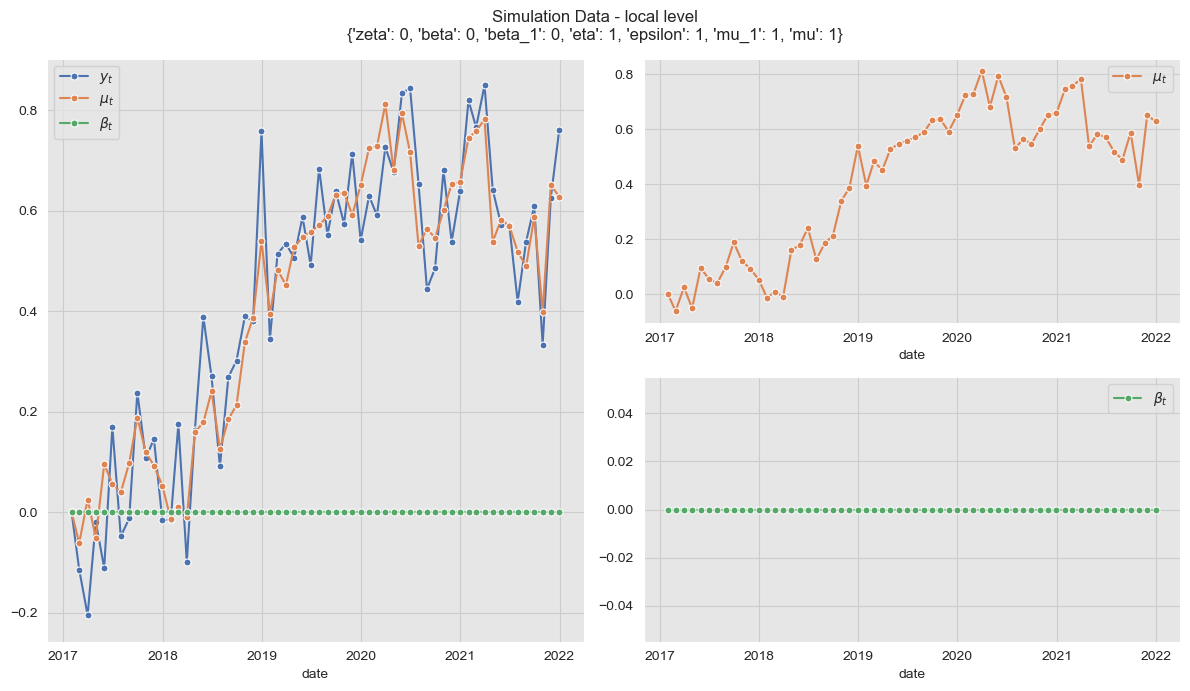

In [5]:
fig = plt.figure(figsize=(12, 7), tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[:, 0])
sns.lineplot(x=data_df['date'], y=y, marker='o', markersize=5, color=sns_c[0], label=r'$y_t$', ax=ax)
sns.lineplot(x=data_df['date'], y=mu, marker='o', markersize=5, color=sns_c[1], label=r'$\mu_t$', ax=ax)
sns.lineplot(x=data_df['date'], y=beta, marker='o', markersize=5, color=sns_c[2], label=r'$\beta_t$', ax=ax)

ax0 = fig.add_subplot(gs[0, 1])
sns.lineplot(x=data_df['date'], y=mu, marker='o', markersize=5, color=sns_c[1], label=r'$\mu_t$', ax=ax0)

ax1 = fig.add_subplot(gs[1, 1])
sns.lineplot(x=data_df['date'], y=beta, marker='o', markersize=5, color=sns_c[2], label=r'$\beta_t$', ax=ax1)

fig.suptitle(f'Simulation Data - {model_name}\n{params}');

Let us generate a target variable `z` to model by adding an external regressor `x` and a seasonal component `s`.

In [6]:
data_df['y'] = y

# Add external regressor.
x = np.random.uniform(low=0.0, high=1.0, size=n)
data_df['x'] = np.where( x > 0.80, x, 0)
# Add seasonal component.
data_df['cs'] = np.sin(2 * np.pi * data_df['date'].dt.dayofyear / 356.5) 
data_df['cc'] = np.cos(3 * np.pi * data_df['date'].dt.dayofyear / 356.5) 
data_df['s'] = data_df['cs'] + data_df['cc']
# Construct target variable.
data_df['z'] = data_df['y'] + data_df['x'] + data_df['s']

Let us plot the resulting target variable and its components:

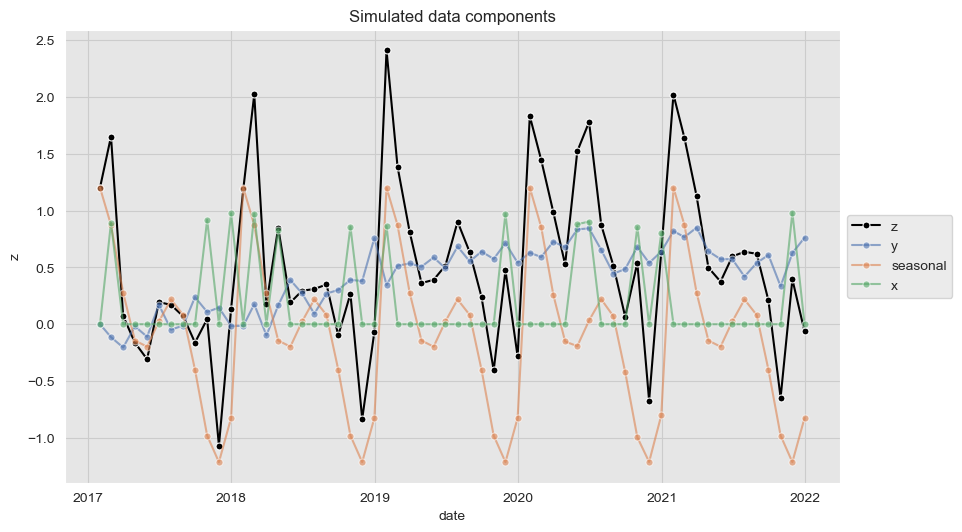

In [7]:
fig, ax = plt.subplots()
sns.lineplot(x='date', y='z', data=data_df, marker='o', markersize=5, color='black', label='z', ax=ax)
sns.lineplot(x='date', y='y', data=data_df, marker='o', markersize=5, color=sns_c[0], alpha=0.6, label='y', ax=ax)
sns.lineplot(x='date', y='s', data=data_df, marker='o', markersize=5, color=sns_c[1], alpha=0.6, label='seasonal', ax=ax)
sns.lineplot(x='date', y='x', data=data_df, marker='o', markersize=5, color=sns_c[2], alpha=0.6, label='x', ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Simulated data components');

In [8]:
# Set date as index.
data_df.set_index('date', inplace=True)
data_df.index = pd.DatetimeIndex(
    data=data_df.index.values,
    freq=data_df.index.inferred_freq
)

We not do a train-test split of the data:

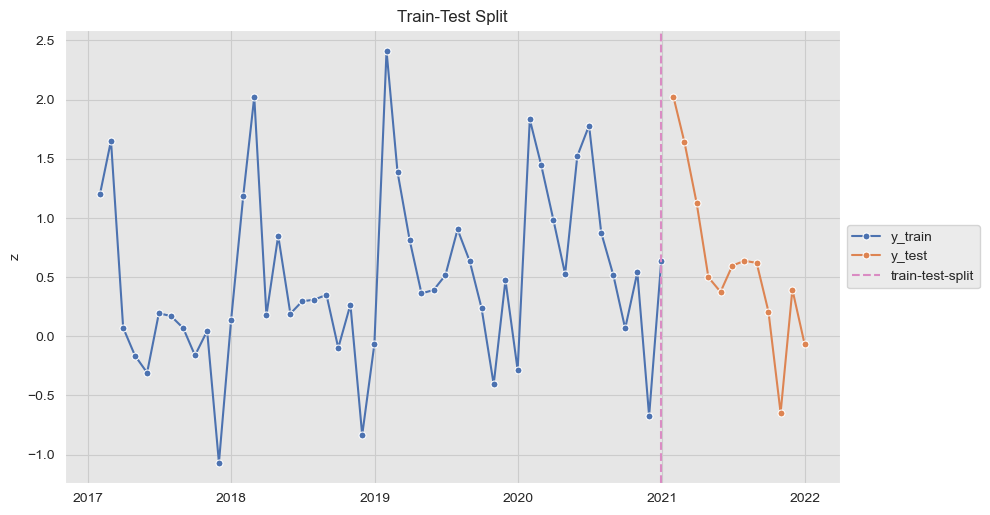

In [9]:
train_test_ratio = 0.80
n_train = int(n * train_test_ratio)
n_test = n - n_train

data_train_df = data_df[: n_train]
data_test_df = data_df[- n_test :]

y_train = data_train_df['z']
x_train = data_train_df[['x']]

y_test = data_test_df['z']
x_test = data_test_df[['x']]

fig, ax = plt.subplots()
sns.lineplot(x=y_train.index, y=y_train, marker='o', markersize=5, color=sns_c[0], label='y_train', ax=ax)
sns.lineplot(x=y_test.index, y=y_test, marker='o', markersize=5, color=sns_c[1], label='y_test', ax=ax)
ax.axvline(x=x_train.tail(1).index[0], color=sns_c[6], linestyle='--', label='train-test-split')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Train-Test Split');

## Model

Now that we have the data, let us use the `statsmodels` implementation of the unobserved components model to generate forecasts on the test-set.

In [10]:
model_params =  {
    'endog': y_train,
    'exog': x_train,
    'level': 'local level',
    'freq_seasonal': [
         {'period': 12, 'harmonics': 4}
    ],
    'autoregressive': 1,
    'mle_regression': False,
 }
 
model = UnobservedComponents(**model_params)

result = model.fit(disp=0)

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                Unobserved Components Results                                
=============================================================================================
Dep. Variable:                                     z   No. Observations:                   48
Model:                                   local level   Log Likelihood                  -3.433
                   + stochastic freq_seasonal(12(4))   AIC                             16.865
                                             + AR(1)   BIC                             25.053
Date:                               Wed, 08 Sep 2021   HQIC                            19.778
Time:                                       09:01:48                                         
Sample:                                   01-31-2017                                         
                                        - 12-31-2020                                         
Covariance Type:                                 opg                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
sigma2.irregular               0.0290      0.037      0.786      0.432      -0.043       0.101
sigma2.level                   0.0035      0.004      0.920      0.358      -0.004       0.011
sigma2.freq_seasonal_12(4)  2.443e-11      0.000   6.79e-08      1.000      -0.001       0.001
sigma2.ar                   2.941e-13      0.056   5.22e-12      1.000      -0.110       0.110
ar.L1                          0.2269   1.17e-13   1.94e+12      0.000       0.227       0.227
===================================================================================
Ljung-Box (L1) (Q):                   5.51   Jarque-Bera (JB):                 0.58
Prob(Q):                              0.02   Prob(JB):                         0.75
Heteroskedasticity (H):               1.63   Skew:                             0.01
Prob(H) (two-sided):                  0.39   Kurtosis:                         2.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.36e+39. Standard errors may be unstable.
"""

We can easily plot some diagnostics:

/opt/anaconda3/envs/btsa/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


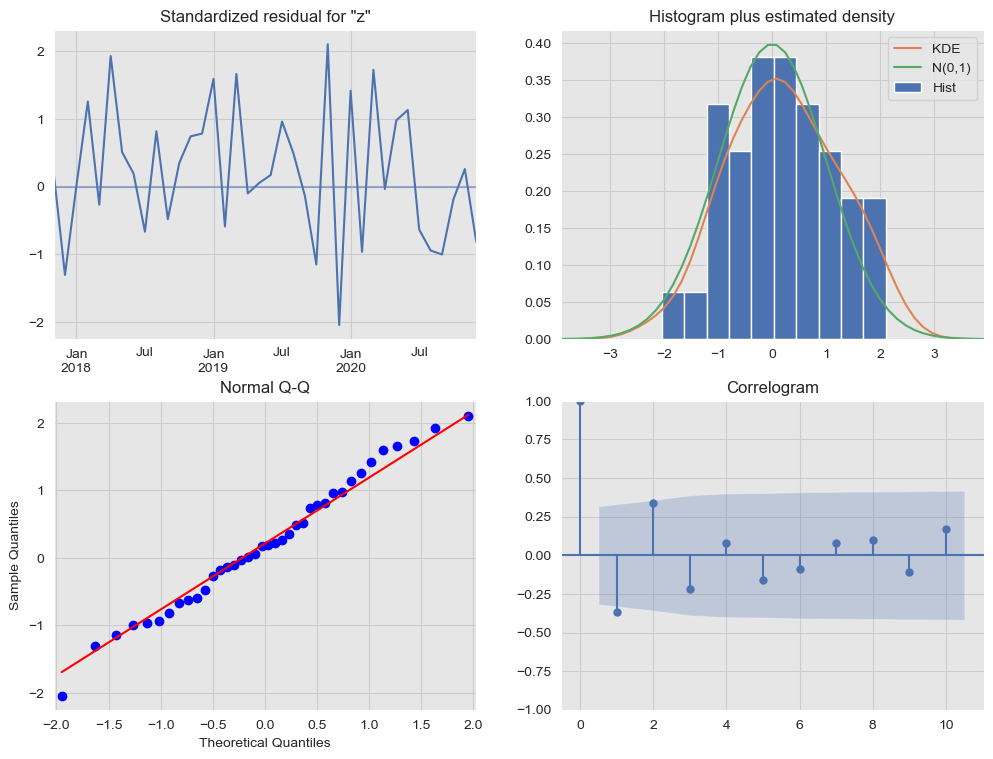

In [11]:
result.plot_diagnostics(figsize=(12, 9));

Let us plot the components of the model:

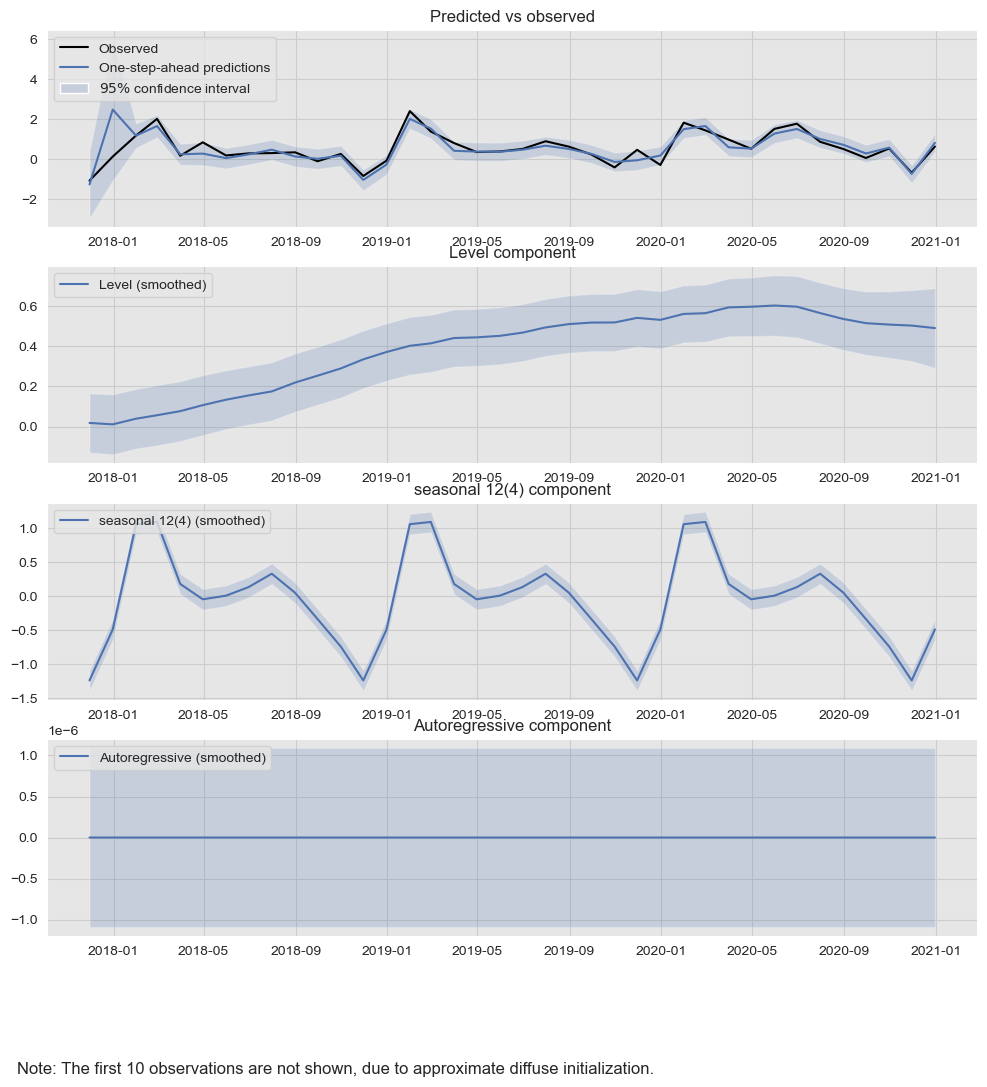

In [12]:
result.plot_components(
    alpha=0.05,
    legend_loc='upper left',
    figsize=(12, 12)
);

**Remark:** Note we have some burnout observations considered for the MLE estimation step. See the [`initialize_default`](https://github.com/statsmodels/statsmodels/blob/main/statsmodels/tsa/statespace/structural.py#L793) methods of the `UnobservedComponents` class. The formula is given by:

In [13]:
print(f'''
k_states = {model.k_states}
unused_state = {int(model._unused_state)}
ar_order = {model.ar_order}
burnout_obs = {
    model.k_states - int(model._unused_state) - model.ar_order
}
''')


k_states = 11
unused_state = 0
ar_order = 1
burnout_obs = 10



Let us deep dive into the computation of the `k_states`:

In [14]:
print(f'''
level = {int(model.level)}
k_freq_seas_states = {model._k_freq_seas_states}
ar_order = {model.ar_order}
k_exog = {int((not model.mle_regression) * model.k_exog)}
k_states = {
    model.level + model._k_freq_seas_states + model.ar_order + (not model.mle_regression) * model.k_exog
}
''')


level = 1
k_freq_seas_states = 8
ar_order = 1
k_exog = 1
k_states = 11



## Predictions

We can now generate predictions on the training and test sets (with prediction intervals):

In [15]:
predictions_df = result \
    .get_prediction(steps=n_train, exog=x_train) \
    .summary_frame(alpha=0.95)

forecast_df = result \
    .get_forecast(steps=n_test, exog=x_test) \
    .summary_frame(alpha=0.95)

predictions_df.iloc[0] = 0

In addition, we can simulate from the fitted model:

In [16]:
repetitions = 100

simulations_train_df = result.simulate(
    anchor='start',
    nsimulations=n_train,
    repetitions=repetitions,
    exog=x_train
)

simulations_test_df = result.simulate(
    anchor='end',
    nsimulations=n_test,
    repetitions=repetitions,
    exog=x_test
)

# Verify expected shape of the simulations dataframes.
assert simulations_train_df.shape == (n_train, repetitions)
assert simulations_test_df.shape == (n_test, repetitions)

We can compute some statistics from the simulated samples:

In [17]:
y_train_pred_mean = simulations_train_df.mean(axis=1)
y_train_pred_std = simulations_train_df.std(axis=1)
y_train_pred_plus = y_train_pred_mean + 2 * y_train_pred_std
y_train_pred_minus = y_train_pred_mean - 2 * y_train_pred_std

y_test_pred_mean = simulations_test_df.mean(axis=1)
y_test_pred_std = simulations_test_df.std(axis=1)
y_test_pred_plus = y_test_pred_mean + 2 * y_test_pred_std
y_test_pred_minus = y_test_pred_mean - 2 * y_test_pred_std

Finally, let us visualize the results:

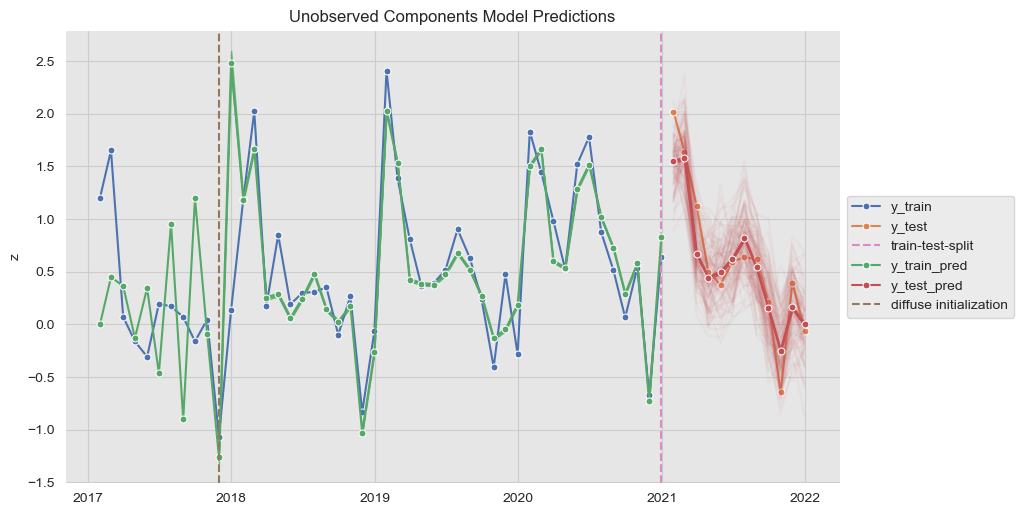

In [18]:
fig, ax = plt.subplots()

# Input data
sns.lineplot(
    x=y_train.index,
    y=y_train,
    marker='o',
    markersize=5,
    color=sns_c[0],
    label='y_train',
    ax=ax
)
sns.lineplot(
    x=y_test.index,
    y=y_test,
    marker='o',
    markersize=5,
    color=sns_c[1],
    label='y_test',
    ax=ax
)
ax.axvline(
    x=x_train.tail(1).index[0],
    color=sns_c[6],
    linestyle='--',
    label='train-test-split'
)

# Simulations
for col in simulations_test_df.columns:
    sns.lineplot(
        x=simulations_test_df.index,
        y=simulations_test_df[col],
        color=sns_c[3],
        alpha=0.05, 
        ax=ax
    )

# Prediction intervals
ax.fill_between(
    x=y_train.index[10: ],
    y1=predictions_df['mean_ci_lower'][10: ],
    y2=predictions_df['mean_ci_upper'][10: ],
    color=sns_c[2],
    alpha=0.8
)
ax.fill_between(
    x=y_test.index,
    y1=forecast_df['mean_ci_lower'],
    y2=forecast_df['mean_ci_upper'],
    color=sns_c[3],
    alpha=0.8
)

# Predictions
sns.lineplot(
    x=y_train.index,
    y=predictions_df['mean'],
    marker='o',
    markersize=5,
    color=sns_c[2],
    label='y_train_pred',
    ax=ax
)
sns.lineplot(
    x=y_test.index,
    y=forecast_df['mean'],
    marker='o',
    markersize=5,
    color=sns_c[3],
    label='y_test_pred',
    ax=ax
)
ax.axvline(
    x=y_train.index[10],
    color=sns_c[5],
    linestyle='--',
    label='diffuse initialization'
)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Unobserved Components Model Predictions')
plt.savefig(f'images/unobserved_components_predictions.png', dpi=200, bbox_inches='tight');

**Remark:** One can extend this model into the Bayesian framework with [PyMC3](https://docs.pymc.io/), see [Appendix-A.-Application-to-UnobservedComponents-models](https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_pymc3.html#Appendix-A.-Application-to-UnobservedComponents-models) from statsmodels documentation.